Besu IBFT2.0 Log Data Analysis

In [1]:
import pandas as pd
import numpy as np
import csv, warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

def log2csv(log_file: str):
    with open(log_file, 'r') as file:
        lines = file.read().splitlines()
        csv_lines = [x.split(' | ') for x in lines]
        csv_file = log_file.replace('.log', '.csv')
        with open(csv_file, 'w+') as csv_file:
            w = csv.writer(csv_file)
            w.writerows(csv_lines)

def parse_log(log_file: str) -> pd.DataFrame:
    log2csv(log_file)
    csv_file = log_file.replace('.log', '.csv')
    header = ['Timestamp', 'Process', 'LogLevel', 'LogSource', 'Description']
    df_besu = pd.read_csv(csv_file, parse_dates=['Timestamp'], names=header).dropna()
    df_besu['Timestamp'] = pd.to_datetime(df_besu.Timestamp, infer_datetime_format=True, utc=True)
    
    df_ibftround = df_besu[df_besu.LogSource == 'IbftRound']
    df_temp = df_ibftround.loc[:, 'Description'].str.split('\. round=ConsensusRoundIdentifier', expand=True)
    df_ibftround.loc[:, 'Action'] = df_temp[0].values
    df_ibftround.loc[:, 'Order'] = df_temp[1].values
    df_des = df_ibftround.Order.str.split('Sequence=', expand=True)[1].str.split('\, Round=', expand=True)
    df_ibftround.loc[:, 'Sequence'] = df_des[0].astype(int)
    df_ibftround.loc[:, 'Round'] = df_des[1].str.split('\}', expand=True)[0].astype(int)

    df_ibftround.reset_index(inplace=True)
    df_ibftround.drop(columns=['index', 'Description','Order'], axis=1, inplace=True)
    return df_ibftround

def gen_logs_df(logpath, networksize=4):
    df_list = []
    for i in range(networksize):
        log_file = '{}/besu-{}.log'.format(logpath,i+1)
        df = parse_log(log_file)
        df['Node'] = i+1
        df_list.append(df)
    df = pd.concat(df_list)
    return df

def cal_time_delta(send: str, receive: str, df: pd.DataFrame) -> list:
    t_delta_ls = []
    sequences = df.Sequence.unique()
    for seq in sequences:
        df_seq = df_all.loc[df_all.Sequence == seq]
        if send in df_seq.Action.unique():
            c_time = pd.to_datetime(df_seq[df_seq.Action == send].Timestamp.values[0], utc=True)
            df_r = df_seq.loc[df_seq.Action == receive]
            for _, row in df_r.iterrows():
                t_delta = pd.to_datetime(row.Timestamp, utc=True) - c_time
                t_delta_ls.append(t_delta.total_seconds())
    return t_delta_ls

def plot_hist(t_tran_pro, t_tran_pre, t_tran_com):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
    x0 = [1000*t for t in t_tran_pro if t<0.05]
    axs[0].hist(x0, bins=50)
    axs[0].set(title='Frequency Histogram', xlabel='Transmission Time (ms)', ylabel='Frequency')
    x1 = [1000*t for t in t_tran_pre if t>-0.05 and t<0.05]
    axs[1].hist(x1, bins=50)
    axs[1].set(title='Frequency Histogram', xlabel='Transmission Time (ms)', ylabel='Frequency')
    x2 = [1000*t for t in t_tran_com if t>-0.05 and t<0.05]
    axs[2].hist(x2, bins=50)
    axs[2].set(title='Frequency Histogram', xlabel='Transmission Time (ms)', ylabel='Frequency')

['Sending proposal with new block' 'Received a prepare message'
 'Sending commit message' 'Received a commit message'
 'Importing block to chain' 'Received a proposal message'
 'Sending prepare message' 'Creating proposed block']


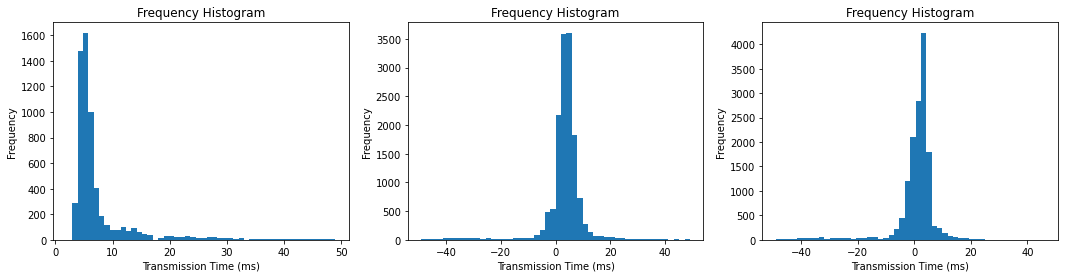

In [98]:
log_path = '../data/logs-20211215-141843-4c-8gb'
df_all = gen_logs_df(logpath=log_path)
print(df_all.Action.unique())
t_tran_pro = cal_time_delta(send='Creating proposed block', receive='Received a proposal message', df=df_all)
t_tran_pre = cal_time_delta(send='Sending prepare message', receive='Received a prepare message', df=df_all)
t_dran_com = cal_time_delta(send='Sending commit message', receive='Received a commit message', df=df_all)
plot_hist(t_tran_pro, t_tran_pre, t_dran_com)

['Sending proposal with new block' 'Received a prepare message'
 'Sending commit message' 'Received a commit message'
 'Importing block to chain' 'Received a proposal message'
 'Sending prepare message' 'Creating proposed block']


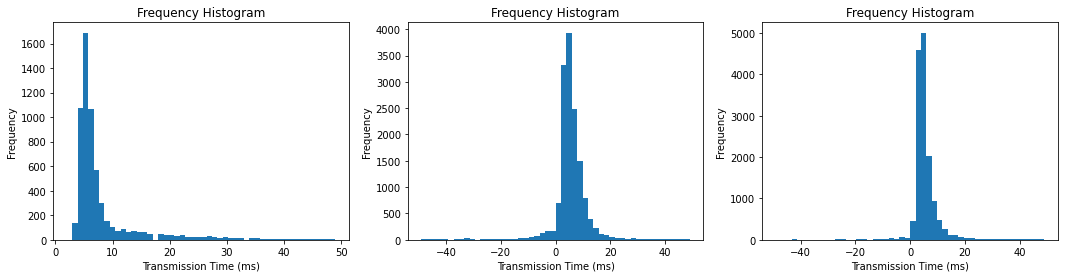

In [100]:
log_path = '../data/logs-20211215-154842-2c-4gb'
df_all = gen_logs_df(logpath=log_path)
print(df_all.Action.unique())
t_tran_pro = cal_time_delta(send='Creating proposed block', receive='Received a proposal message', df=df_all)
t_tran_pre = cal_time_delta(send='Sending prepare message', receive='Received a prepare message', df=df_all)
t_dran_com = cal_time_delta(send='Sending commit message', receive='Received a commit message', df=df_all)
plot_hist(t_tran_pro, t_tran_pre, t_dran_com)

['Creating proposed block' 'Received a proposal message'
 'Sending prepare message' 'Received a prepare message'
 'Sending commit message' 'Received a commit message'
 'Importing block to chain' 'Sending proposal with new block']


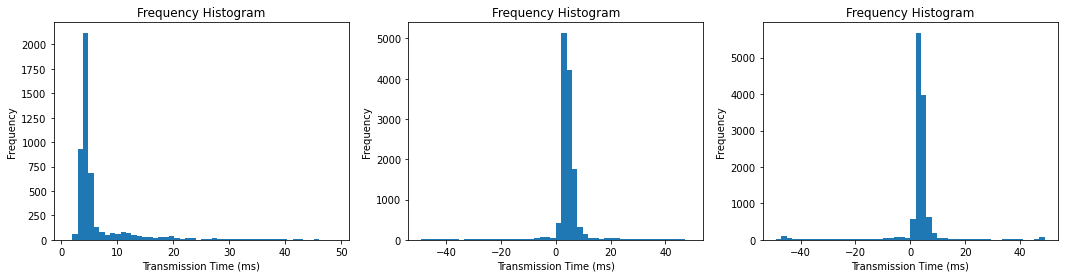

In [101]:
log_path = '../data/logs-20211215-171026-8c-8gb'
df_all = gen_logs_df(logpath=log_path)
print(df_all.Action.unique())
t_tran_pro = cal_time_delta(send='Creating proposed block', receive='Received a proposal message', df=df_all)
t_tran_pre = cal_time_delta(send='Sending prepare message', receive='Received a prepare message', df=df_all)
t_dran_com = cal_time_delta(send='Sending commit message', receive='Received a commit message', df=df_all)
plot_hist(t_tran_pro, t_tran_pre, t_dran_com)